# [다익스트라] Gold IV 1753 최단 경로 구하기

### 문제
방향그래프가 주어지면 주어진 시작점에서 다른 모든 정점으로의 최단 경로를 구하는 프로그램을 작성하시오. 단, 모든 간선의 가중치는 10 이하의 자연수이다.

### 입력
첫째 줄에 정점의 개수 V와 간선의 개수 E가 주어진다. (1 ≤ V ≤ 20,000, 1 ≤ E ≤ 300,000) 모든 정점에는 1부터 V까지 번호가 매겨져 있다고 가정한다. 둘째 줄에는 시작 정점의 번호 K(1 ≤ K ≤ V)가 주어진다. 셋째 줄부터 E개의 줄에 걸쳐 각 간선을 나타내는 세 개의 정수 (u, v, w)가 순서대로 주어진다. 이는 u에서 v로 가는 가중치 w인 간선이 존재한다는 뜻이다. u와 v는 서로 다르며 w는 10 이하의 자연수이다. 서로 다른 두 정점 사이에 여러 개의 간선이 존재할 수도 있음에 유의한다.

### 출력
첫째 줄부터 V개의 줄에 걸쳐, i번째 줄에 i번 정점으로의 최단 경로의 경로값을 출력한다. 시작점 자신은 0으로 출력하고, 경로가 존재하지 않는 경우에는 INF를 출력하면 된다.

### 입출력 예

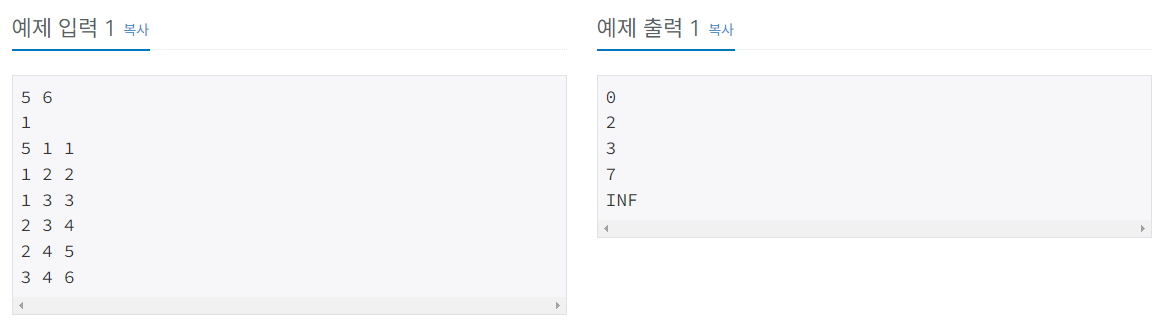

### 내 풀이

In [9]:
import sys
from queue import PriorityQueue

V, E = map(int, sys.stdin.readline().split()) # 노드개수, 에지개
K = int(input())      # 시작 노드
distance = [sys.maxsize]*(V+1)
visited = [False] * (V+1)
myList = [[] for _ in range(V+1)]
q = PriorityQueue()

for _ in range(E):
    u, v, w = map(int, sys.stdin.readline().split())
    myList[u].append((v, w))
    
q.put((0,K))
distance[K] = 0

while q.qsize() > 0:
    current = q.get()
    c_v = current[1]
    if visited[c_v]:
        continue
    visited[c_v] = True
    for tmp in myList[c_v]:
        next = tmp[0]
        value = tmp[1]
        if distance[next] > distance[c_v] + value:
            distance[next] = distance[c_v] + value
            q.put((distance[next], next))
            
for i in range(1, V+1):
    if distance[i] != sys.maxsize:
        print(distance[i])
    else:
        print('INF')

### 지피티는 이렇게 풀더라

In [ ]:
import heapq
import sys

# 다익스트라 알고리즘을 사용하여 최단 경로를 찾는 함수
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}  # 시작 정점으로부터의 거리를 저장하는 딕셔너리
    distances[start] = 0  # 시작 정점의 거리는 0
    queue = [(0, start)]  # 우선순위 큐를 사용하여 방문할 정점과 거리를 저장하는 리스트

    while queue:
        current_distance, current_node = heapq.heappop(queue)  # 가장 가까운 정점과 그 거리를 가져옴

        if current_distance > distances[current_node]:
            continue  # 이미 처리된 정점이라면 스킵

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:  # 현재 경로가 더 짧다면 갱신
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))  # 다음 정점을 위해 큐에 추가

    return distances

# 정점 개수(V), 간선 개수(E) 입력
V, E = map(int, input().split())
start = int(input())  # 시작 정점 번호 입력
graph = {i: {} for i in range(1, V + 1)}  # 각 정점마다 인접한 정점과 가중치를 저장하는 그래프

# 간선 정보 입력 및 그래프 구성
for _ in range(E):
    u, v, w = map(int, input().split())  # u에서 v로 가는 가중치 w의 간선
    if v in graph[u]:
        graph[u][v] = min(graph[u][v], w)  # 이미 저장된 간선이 있다면 더 작은 가중치로 업데이트
    else:
        graph[u][v] = w  # 처음 보는 간선이라면 가중치 저장

# 다익스트라 알고리즘을 통해 최단 경로 계산
distances = dijkstra(graph, start)

# 결과 출력
for i in range(1, V + 1):
    if distances[i] == float('inf'):
        print("INF")  # 시작 정점으로부터 도달할 수 없는 경우
    else:
        print(distances[i])  # 최단 거리 출력
